# Analizing one run of the EA

# Preliminaries
## Importing packages

In [1]:
import numpy as np

%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style('whitegrid')
sns.set_context('notebook')

from thesis_EAfunc import *
from thesis_visfunc import *

TabError: inconsistent use of tabs and spaces in indentation (thesis_visfunc.py, line 125)

In [ ]:
import datetime
time_a = datetime.datetime.now()
print(time_a)

# Define landscape

In [ ]:
#Problem domain
x_min = -15
x_max = 15
y_min = -15
y_max = 15

#Known minimum
x_point = -1
y_point = -1

domain = (x_min, x_max, y_min, y_max)
point = (x_point, y_point)
img_size = (8.5, 4.25)

#Problem definition
def f(x, y):
    D = 2
    alpha = 1/8
    
    x=(x-5)/6
    y=(y-5)/6
    
    a = np.abs(x ** 2 + y ** 2 - D) ** (alpha * D)
    b = ( 0.5 * (x ** 2 + y ** 2) + (x + y) ) / D
        
    return (a + b + 0.5)

#Testing the minimum
f(-1,-1)

# Running the Evolutionary Algorithm
## Setting the EA's parameters

In [2]:
#starting seed
np.random.seed(654321)

In [3]:
#Algorithm parameters
## Number of experiments, and generations per experiment
exp_n = 1
gen_f = 40

## Population size
pop_s = 20

## Parent subpopulation's selection method and size
par_selection = 'Ranking'
par_s = 10

## Progeny subpopulation's and size
prog_s = par_s
### Crossover Method
crossover = 'Simple'
### Mutation method, probability and size
mutation = 'random_co_dis'
mut_p = 0.5
mut_s = 2.5

## New population selection method
population_new='Ranking'

## We run the EA for 1 generation

run_n = 0
birthcounter = 0

population, generations, birthcounter, gen_n = EA_start(pop_s, domain, f, birthcounter)

for i in range(gen_f):
    birthcounter, progeny = EA_prog(population, par_s, prog_s, birthcounter, gen_n, mut_p, mut_s, domain, f, par_selection, crossover, mutation)
    generations = EA_prog_to_df(generations, progeny)
    gen_n, population, progeny = EA_new_population(population, progeny, gen_n, pop_s, f, population_new)
    generations = EA_pop_to_df(generations, population)

fitness = EA_fitn_summary(generations)

In [4]:
genera_res, fitness_res = EA_exp(exp_n, gen_f, f, domain, pop_s, par_s, prog_s, mut_p, mut_s, par_selection, crossover, mutation, population_new)

NameError: name 'f' is not defined

In [5]:
query = (genera_res['generation']==40)
genera_res[query]

NameError: name 'genera_res' is not defined

# Visualization
## Fitness development

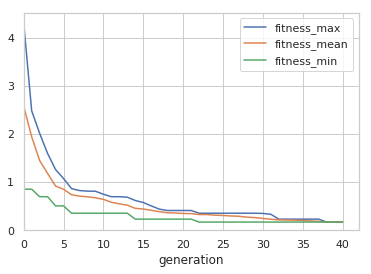

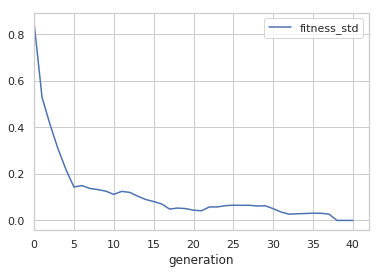

In [8]:
EA_fitn_dev(fitness_res, 0)

## Visualizing Landscape

In [9]:
#Visualization parameters
grph_steps = 61
a=15
b=-60
ratio_w=1.3
ln=.75


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


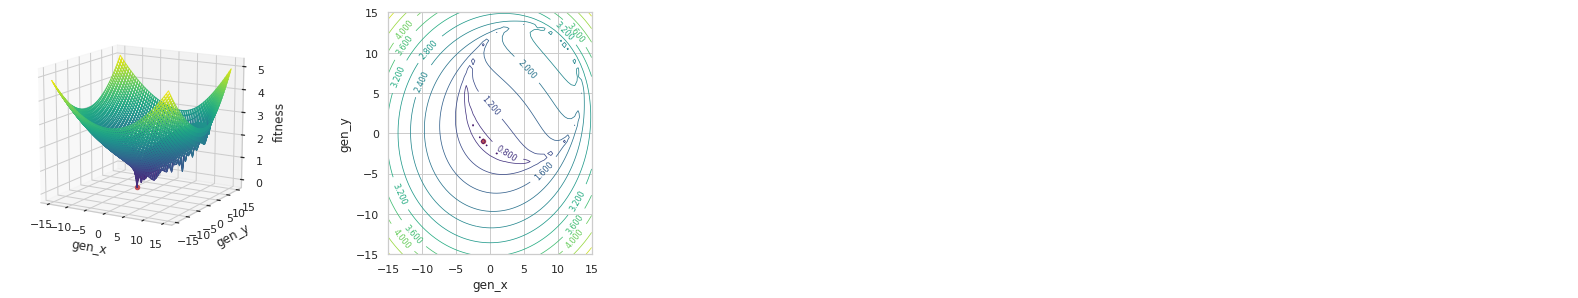

In [10]:
EA_plt_land(f, domain, point, grph_steps, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


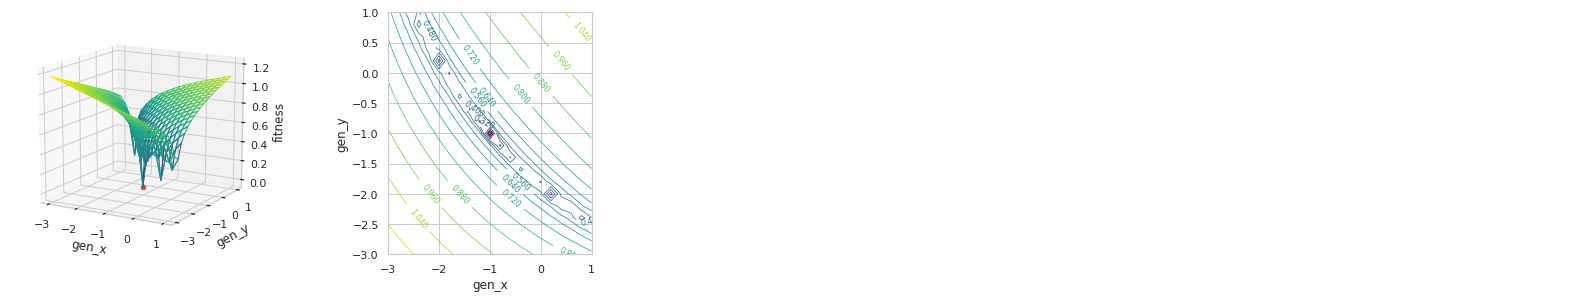

In [11]:
domain_min=(-3,1,-3,1)
EA_plt_land(f, domain_min, point, 21, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

## Visualizing initial population and its progeny

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


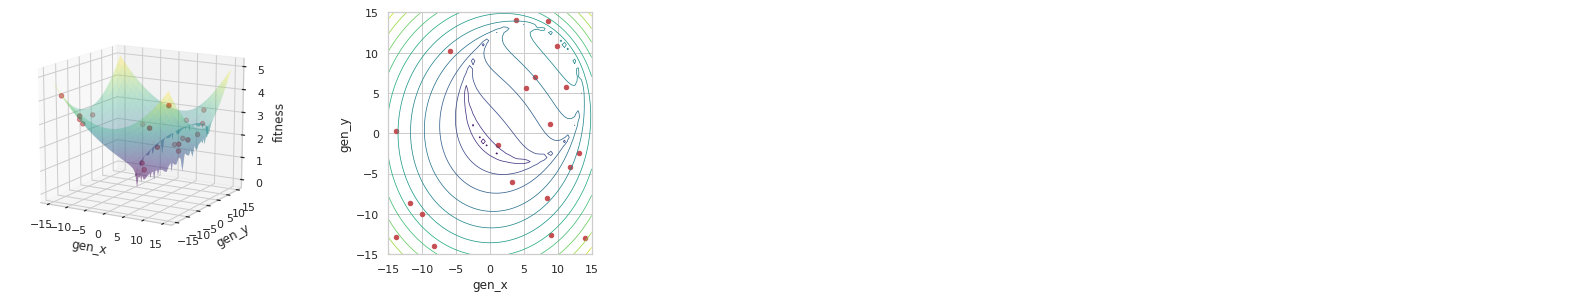

In [12]:
run_s=0  #First (and only) run
gen_s=0  #First generation
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, gen_s, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


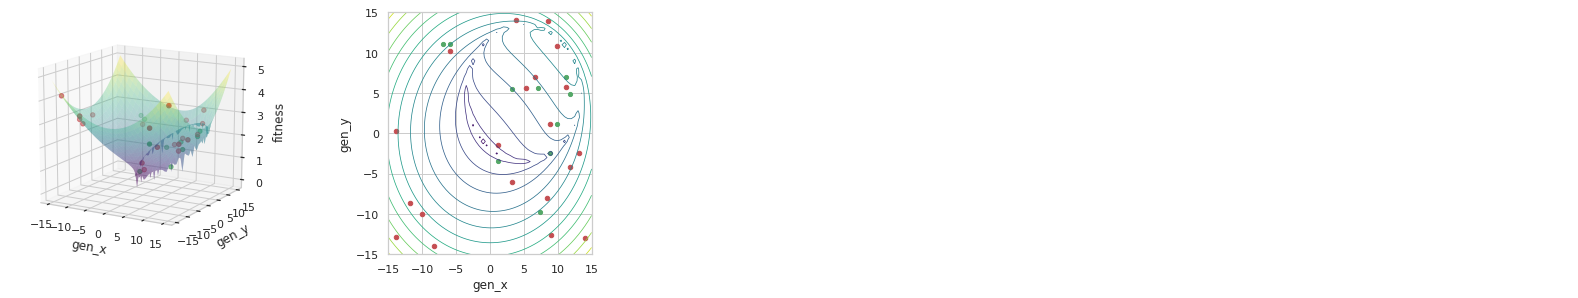

In [13]:
EA_plt_gen(f, domain, grph_steps, genera_res, run_s, gen_s, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

## Checking movement of population

In [14]:
run_s=0  #First (and only) run

Generation 0


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


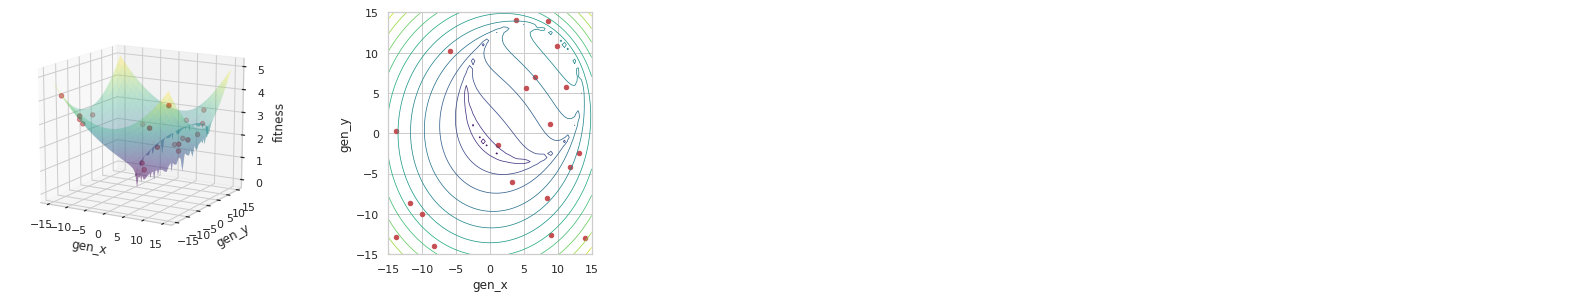

Generation 4


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


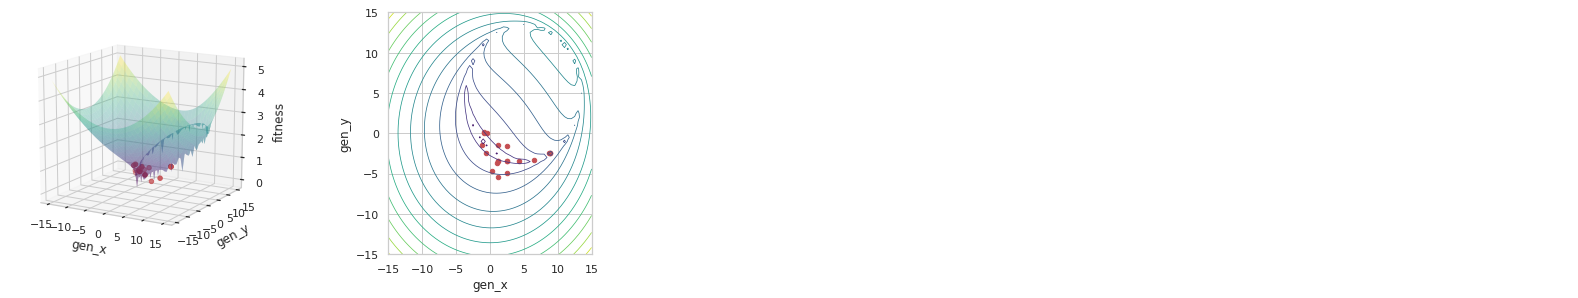

Generation 8


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


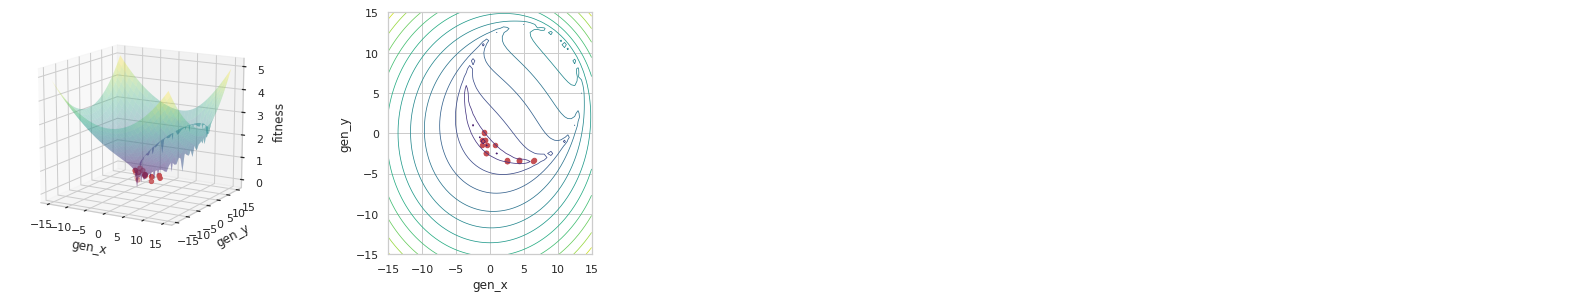

Generation 16


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


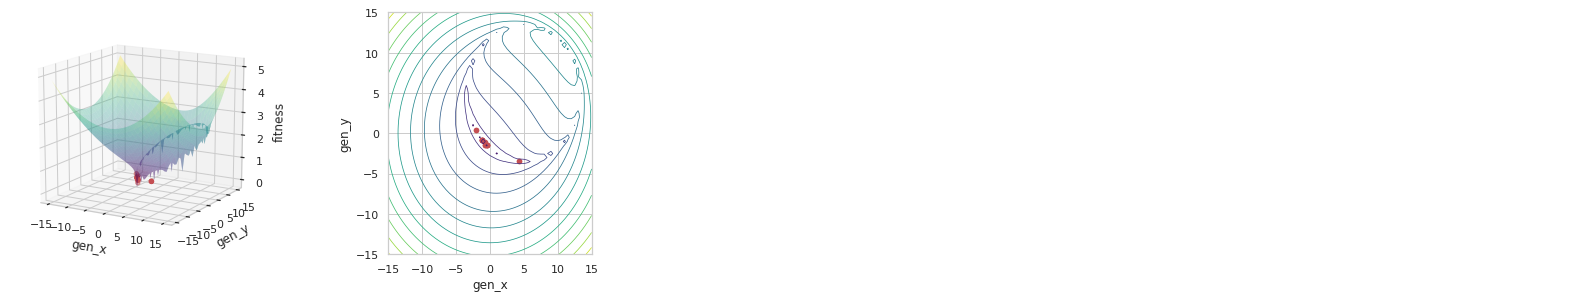

Generation 24


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


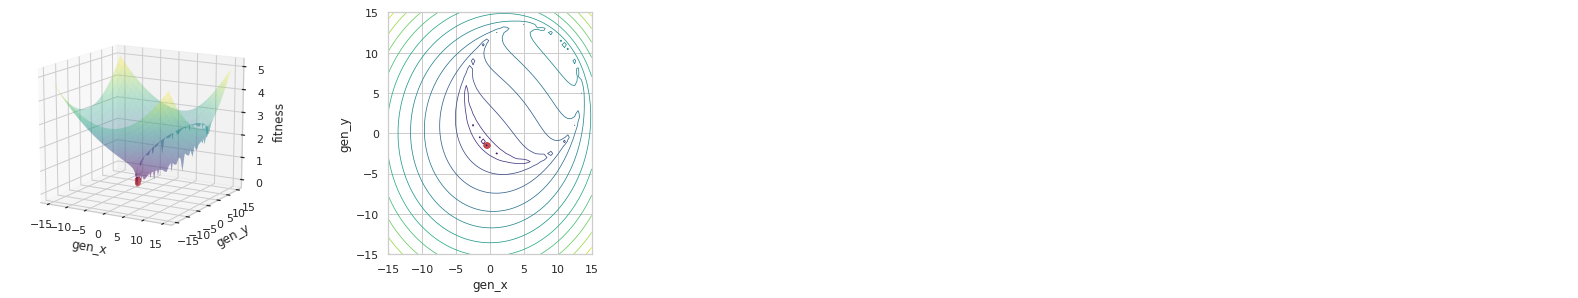

Generation 32


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


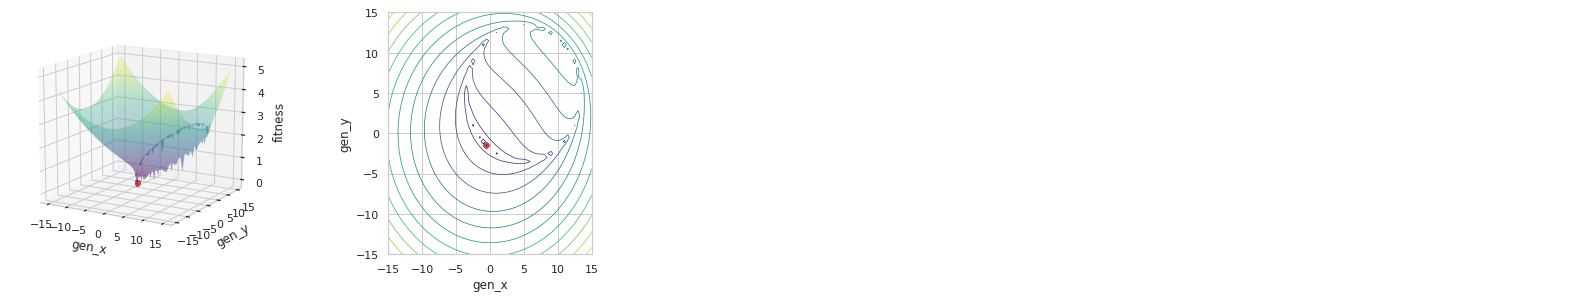

Generation 40


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


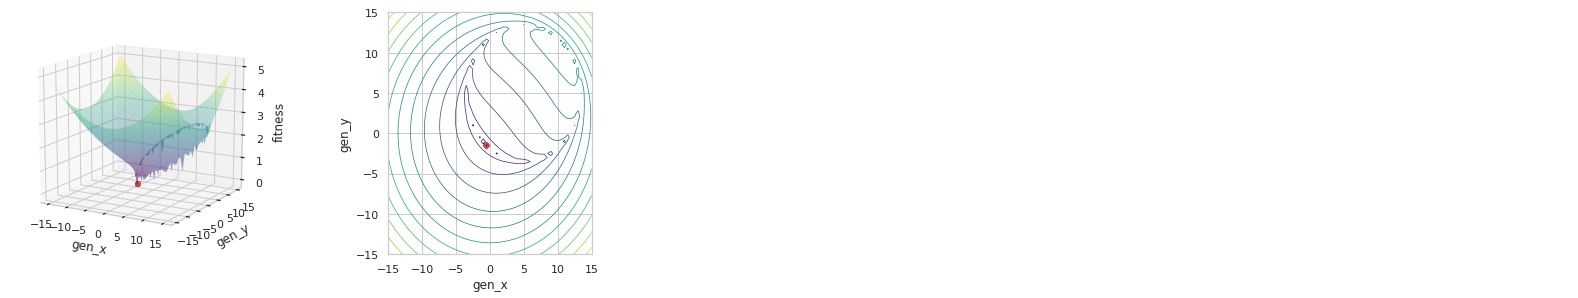

In [16]:
print('Generation 0')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 0, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 4')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 4, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 8')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 8, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 16')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 16, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 24')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 24, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 32')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 32, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)
print('Generation 40')
EA_plt_pop(f, domain, grph_steps, genera_res, run_s, 40, a=a, b=b, imgsize=img_size, ratio_w=ratio_w, ln=ln)

In [17]:
time_b = datetime.datetime.now()
print(time_b-time_a)

0:01:20.597017
